In [41]:
import csv
import pandas as pd
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

data = [
    ["Specimen", "Plain web (kN)", "Unstiffened elongated web holes (kN)", 
     "Shear Strength (Rq=2) Q0.04", "Shear Strength (Rq=2) Q0.06", "Shear Strength (Rq=2) Q0.08", 
     "Shear Strength (Rq=2) Q0.10", "Shear Strength (Rq=2) Q0.12", "Shear Strength (Rq=4) Q0.04", 
     "Shear Strength (Rq=4) Q0.06", "Shear Strength (Rq=4) Q0.08", "Shear Strength (Rq=4) Q0.10", 
     "Shear Strength (Rq=4) Q0.12", "Shear Strength (Rq=6) Q0.04", "Shear Strength (Rq=6) Q0.06", 
     "Shear Strength (Rq=6) Q0.08", "Shear Strength (Rq=6) Q0.10", "Shear Strength (Rq=6) Q0.12"],
    
    ["C240-T1.0-D0.1B2.0", 20.86, 19.78, 20.17, 20.26, 20.35, 20.39, 20.51, 20.15, 20.21, 
     20.30, 20.34, 20.45, 20.12, 20.18, 20.23, 20.30, 20.36],
    
    ["C240-T1.0-D0.3B2.0", 20.86, 12.13, 16.13, 16.25, 16.67, 16.81, 16.94, 14.71, 14.86, 
     15.48, 15.69, 15.81, 14.46, 14.71, 14.90, 15.37, 15.50],
    
    ["C240-T1.0-D0.5B2.0", 20.86, 6.43, 8.12, 8.28, 9.28, 9.58, 9.70, 8.10, 8.26, 
     9.14, 9.41, 9.63, 8.07, 8.24, 8.63, 9.26, 9.47],
    
    ["C240-T1.0-D0.7B2.0", 20.86, 2.45, 3.87, 4.21, 4.72, 4.88, 4.99, 3.84, 4.16, 
     4.67, 4.84, 4.96, 3.81, 4.13, 4.62, 4.80, 4.91],
    
    ["C240-T1.0-D0.3B2.5", 20.86, 11.11, 13.38, 13.41, 14.28, 14.53, 14.63, 13.31, 13.30, 14.12, 
     14.36, 14.48, 13.26, 13.23, 13.67, 14.18, 14.29],

    ["C240-T1.0-D0.5B2.5", 20.86, 5.17, 6.84, 6.93, 7.73, 7.99, 8.14, 6.79, 6.88, 7.66, 
     7.90, 8.06, 6.74, 6.81, 7.26, 7.76, 7.91],

    ["C240-T1.0-D0.7B2.5", 20.86, 1.87, 3.10, 3.25, 3.63, 3.74, 3.76, 3.08, 3.24, 3.57, 
     3.69, 3.72, 3.04, 3.21, 3.51, 3.63, 3.65],

    ["C240-T1.0-D0.1B3.0", 20.86, 19.08, 19.57, 19.60, 19.71, 19.77, 19.86, 19.52, 19.54, 19.66, 
     19.71, 19.82, 19.45, 19.47, 19.57, 19.64, 19.78],

    ["C240-T1.0-D0.3B3.0", 20.86, 9.96, 12.11, 12.26, 13.05, 13.28, 13.38, 12.02, 12.25, 12.89, 
     13.11, 13.32, 11.82, 12.16, 12.47, 12.95, 13.12],

    ["C240-T1.0-D0.5B3.0", 20.86, 4.11, 5.87, 5.96, 6.57, 6.82, 6.97, 5.87, 5.96, 6.51, 
     6.82, 6.95, 5.73, 5.91, 6.34, 6.69, 6.84],

    ["C240-T1.5-D0.1B2.0", 35.98, 35.28, 35.96, 36.00, 36.06, 36.15, 36.25, 35.82, 35.96, 36.03, 
     36.13, 36.23, 35.77, 35.91, 35.94, 36.05, 36.08],

    ["C240-T1.5-D0.3B2.0", 35.98, 21.97, 26.64, 26.74, 28.52, 29.16, 29.35, 26.60, 26.65, 28.29, 
     28.82, 29.14, 26.55, 26.56, 27.40, 28.51, 28.82],

    ["C240-T1.5-D0.5B2.0", 35.98, 11.28, 14.92, 15.19, 17.05, 17.74, 18.16, 14.89, 14.61, 16.78, 
     17.66, 18.08, 14.88, 14.57, 16.18, 17.40, 17.78],

    ["C240-T1.5-D0.7B2.0", 35.98, 4.38, 7.84, 8.17, 8.36, 8.53, 8.76, 7.73, 8.09, 8.28, 
     8.51, 8.76, 7.68, 8.05, 8.19, 8.44, 8.67],

    ["C240-T1.5-D0.1B2.5", 35.98, 33.28, 35.56, 35.62, 35.65, 35.66, 35.67, 35.49, 35.57, 35.58, 
     35.62, 35.62, 35.43, 35.48, 35.54, 35.56, 35.57],

    ["C240-T1.5-D0.3B2.5", 35.98, 19.59, 23.90, 24.03, 25.66, 26.20, 26.49, 23.79, 23.84, 25.38, 
     25.89, 26.28, 23.69, 23.71, 24.56, 25.58, 25.97],

    ["C240-T1.5-D0.5B2.5", 35.98, 9.74, 12.75, 12.83, 14.21, 14.79, 15.23, 12.66, 12.74, 14.09, 
     14.61, 15.09, 12.56, 12.61, 13.35, 14.35, 14.81],

    ["C240-T1.5-D0.7B2.5", 35.98, 3.37, 6.12, 6.28, 6.37, 6.41, 6.52, 6.07, 6.25, 6.21, 
     6.35, 6.48, 5.98, 6.20, 6.10, 6.25, 6.36],

    ["C240-T1.5-D0.1B3.0", 35.98, 32.20, 35.09, 35.13, 35.16, 35.20, 35.21, 34.99, 35.03, 35.08, 
     35.12, 35.13, 34.84, 34.87, 34.95, 34.99, 35.11],

    ["C240-T1.5-D0.3B3.0", 35.98, 17.44, 21.39, 21.56, 23.11, 23.64, 23.85, 21.22, 21.54, 22.83, 
     23.34, 23.74, 20.86, 21.37, 22.09, 23.05, 23.40],

    ["C240-T1.5-D0.5B3.0", 35.98, 7.42, 10.51, 10.63, 12.11, 12.55, 12.96, 10.50, 10.62, 12.01, 
     12.54, 12.92, 10.25, 10.54, 11.69, 12.30, 12.71],

    ["C240-T2.0-D0.1B2.0", 54.74, 50.91, 51.83, 52.00, 52.02, 52.11, 52.19, 51.64, 51.95, 51.98, 
     52.07, 52.16, 51.53, 51.84, 51.87, 52.00, 52.12],

    ["C240-T2.0-D0.3B2.0", 54.74, 32.93, 40.70, 40.92, 43.76, 44.75, 45.34, 40.62, 40.78, 43.42, 
     44.23, 45.01, 40.49, 40.75, 42.05, 43.75, 44.52],

    ["C240-T2.0-D0.5B2.0", 54.74, 16.62, 23.14, 23.93, 27.30, 28.32, 29.22, 23.05, 23.57, 26.87, 
     28.19, 29.09, 22.92, 23.37, 25.91, 27.77, 28.61],

    ["C240-T2.0-D0.7B2.0", 54.74, 6.93, 11.43, 12.09, 12.56, 12.60, 12.74, 11.28, 11.98, 12.45, 
     12.57, 12.70, 11.14, 11.86, 12.26, 12.52, 12.66],

    ["C240-T2.0-D0.1B2.5", 54.74, 50.55, 53.17, 53.35, 53.51, 53.67, 53.87, 53.07, 53.27, 53.41, 
     53.60, 53.79, 52.98, 53.17, 53.32, 53.53, 53.69],

    ["C240-T2.0-D0.3B2.5", 54.74, 29.15, 36.23, 36.51, 39.12, 40.10, 40.76, 36.06, 36.23, 38.84, 
     39.83, 40.36, 35.72, 36.01, 38.13, 39.55, 40.12],

    ["C240-T2.0-D0.5B2.5", 54.74, 13.30, 19.39, 19.81, 22.44, 22.89, 23.30, 19.25, 19.67, 22.17, 
     22.72, 23.01, 19.04, 19.60, 21.09, 22.35, 22.66],

    ["C240-T2.0-D0.7B2.5", 54.74, 5.23, 7.97, 8.46, 8.86, 9.00, 9.11, 7.91, 8.44, 8.63, 
     8.91, 9.05, 7.86, 8.43, 8.54, 8.85, 8.99],

    ["C240-T2.0-D0.1B3.0", 54.74, 49.97, 52.94, 53.11, 53.14, 53.17, 53.21, 52.92, 53.08, 53.10, 
     53.13, 53.16, 52.54, 52.76, 52.87, 52.99, 53.10],

    ["C240-T2.0-D0.3B3.0", 54.74, 25.76, 32.23, 32.56, 34.94, 35.85, 36.43, 32.06, 32.27, 34.62, 
     35.44, 36.34, 31.87, 31.99, 33.86, 35.18, 35.88],

    ["C240-T2.0-D0.5B3.0", 54.74, 10.96, 16.31, 16.61, 18.69, 18.89, 19.13, 16.10, 16.47, 18.58, 
     18.86, 19.12, 16.00, 16.41, 17.70, 18.44, 18.85]
]

In [42]:
# Load data into DataFrame
df = pd.DataFrame(data[1:], columns=data[0])
df.head(3)

,Specimen,Plain web (kN),Unstiffened elongated web holes (kN),Shear Strength (Rq=2) Q0.04,Shear Strength (Rq=2) Q0.06,Shear Strength (Rq=2) Q0.08,Shear Strength (Rq=2) Q0.10,Shear Strength (Rq=2) Q0.12,Shear Strength (Rq=4) Q0.04,Shear Strength (Rq=4) Q0.06,Shear Strength (Rq=4) Q0.08,Shear Strength (Rq=4) Q0.10,Shear Strength (Rq=4) Q0.12,Shear Strength (Rq=6) Q0.04,Shear Strength (Rq=6) Q0.06,Shear Strength (Rq=6) Q0.08,Shear Strength (Rq=6) Q0.10,Shear Strength (Rq=6) Q0.12
0,C240-T1.0-D0.1B2.0,20.86,19.78,20.17,20.26,20.35,20.39,20.51,20.15,20.21,20.30,20.34,20.45,20.12,20.18,20.23,20.30,20.36
1,C240-T1.0-D0.3B2.0,20.86,12.13,16.13,16.25,16.67,16.81,16.94,14.71,14.86,15.48,15.69,15.81,14.46,14.71,14.90,15.37,15.50
2,C240-T1.0-D0.5B2.0,20.86,6.43,8.12,8.28,9.28,9.58,9.70,8.10,8.26,9.14,9.41,9.63,8.07,8.24,8.63,9.26,9.47


In [43]:
df.columns

Index(['Specimen', 'Plain web (kN)', 'Unstiffened elongated web holes (kN)',
       'Shear Strength (Rq=2) Q0.04', 'Shear Strength (Rq=2) Q0.06',
       'Shear Strength (Rq=2) Q0.08', 'Shear Strength (Rq=2) Q0.10',
       'Shear Strength (Rq=2) Q0.12', 'Shear Strength (Rq=4) Q0.04',
       'Shear Strength (Rq=4) Q0.06', 'Shear Strength (Rq=4) Q0.08',
       'Shear Strength (Rq=4) Q0.10', 'Shear Strength (Rq=4) Q0.12',
       'Shear Strength (Rq=6) Q0.04', 'Shear Strength (Rq=6) Q0.06',
       'Shear Strength (Rq=6) Q0.08', 'Shear Strength (Rq=6) Q0.10',
       'Shear Strength (Rq=6) Q0.12'],
      dtype='object')

In [44]:
# Extract shear strength columns
shear_strength_cols = [col for col in df.columns if 'Shear Strength' in col]
shear_strength_cols

['Shear Strength (Rq=2) Q0.04',
 'Shear Strength (Rq=2) Q0.06',
 'Shear Strength (Rq=2) Q0.08',
 'Shear Strength (Rq=2) Q0.10',
 'Shear Strength (Rq=2) Q0.12',
 'Shear Strength (Rq=4) Q0.04',
 'Shear Strength (Rq=4) Q0.06',
 'Shear Strength (Rq=4) Q0.08',
 'Shear Strength (Rq=4) Q0.10',
 'Shear Strength (Rq=4) Q0.12',
 'Shear Strength (Rq=6) Q0.04',
 'Shear Strength (Rq=6) Q0.06',
 'Shear Strength (Rq=6) Q0.08',
 'Shear Strength (Rq=6) Q0.10',
 'Shear Strength (Rq=6) Q0.12']

In [47]:
# preprocess shear strength columns
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[shear_strength_cols])
scaled_features[1]

array([0.26023567, 0.25948104, 0.26142743, 0.26176647, 0.26302135,
       0.23264653, 0.23226064, 0.23896469, 0.24043278, 0.24146195,
       0.22867441, 0.23018415, 0.22866894, 0.23527054, 0.23681055])

In [48]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for demonstration
pca_features = pca.fit_transform(scaled_features)
# Convert PCA features to DataFrame
pca_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(pca_features.shape[1])])
pca_df

,PC1,PC2
0,-0.148597,-0.046963
1,-0.510364,-0.019055
2,-1.032725,-0.003434
3,-1.372563,-0.017974
4,-0.643901,-0.013157
5,-1.145239,-0.010333
6,-1.453166,-0.029992
7,-0.198454,-0.045770
8,-0.738152,-0.012877
9,-1.225819,-0.016338


In [51]:
# Prepare target variable
target_col = "Shear Strength (Rq=2) Q0.04"
target = df[target_col]
target

0     20.17
1     16.13
2      8.12
3      3.87
4     13.38
5      6.84
6      3.10
7     19.57
8     12.11
9      5.87
10    35.96
11    26.64
12    14.92
13     7.84
14    35.56
15    23.90
16    12.75
17     6.12
18    35.09
19    21.39
20    10.51
21    51.83
22    40.70
23    23.14
24    11.43
25    53.17
26    36.23
27    19.39
28     7.97
29    52.94
30    32.23
31    16.31
Name: Shear Strength (Rq=2) Q0.04, dtype: float64

In [52]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_df, target, test_size=0.2, random_state=42)

In [53]:
# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
# Make predictions
y_pred = model.predict(X_test)

In [55]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [56]:
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.012240255034951459
R^2 Score: 0.9999517234569051


In [57]:
from sklearn.linear_model import Ridge

# Initialize and train the Ridge regression model
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Mean Squared Error:", mse_ridge)
print("Ridge Regression R^2 Score:", r2_ridge)


Ridge Regression Mean Squared Error: 0.5225622382612267
Ridge Regression R^2 Score: 0.9979389728119927


In [58]:
from sklearn.linear_model import Lasso

# Initialize and train the Lasso regression model
lasso_model = Lasso(alpha=0.1)  # alpha is the regularization strength
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Mean Squared Error:", mse_lasso)
print("Lasso Regression R^2 Score:", r2_lasso)


Lasso Regression Mean Squared Error: 0.3341541024037911
Lasso Regression R^2 Score: 0.9986820695419364


In [59]:
from sklearn.svm import SVR

# Initialize and train the SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # kernel='rbf' for non-linear
svr_model.fit(X_train, y_train)

# Make predictions
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("SVR Mean Squared Error:", mse_svr)
print("SVR R^2 Score:", r2_svr)


SVR Mean Squared Error: 136.4537406098125
SVR R^2 Score: 0.46181555284611286


In [60]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree model
tree_model = DecisionTreeRegressor(max_depth=5)  # max_depth to control overfitting
tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree Regression Mean Squared Error:", mse_tree)
print("Decision Tree Regression R^2 Score:", r2_tree)


Decision Tree Regression Mean Squared Error: 3.5902285714285744
Decision Tree Regression R^2 Score: 0.9858398518777475


In [61]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Make predictions
y_pred_forest = forest_model.predict(X_test)

# Evaluate the model
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print("Random Forest Regression Mean Squared Error:", mse_forest)
print("Random Forest Regression R^2 Score:", r2_forest)


Random Forest Regression Mean Squared Error: 4.10431935857141
Random Forest Regression R^2 Score: 0.9838122367692945


In [62]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize and train the ANN model
ann_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
ann_model.fit(X_train, y_train)

# Make predictions
y_pred_ann = ann_model.predict(X_test)

# Evaluate the model
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print("ANN Mean Squared Error:", mse_ann)
print("ANN R^2 Score:", r2_ann)


ANN Mean Squared Error: 0.03218890061821315
ANN R^2 Score: 0.9998730444060655


In [63]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Mean Squared Error:", mse_gb)
print("Gradient Boosting R^2 Score:", r2_gb)


Gradient Boosting Mean Squared Error: 1.7624920871594878
Gradient Boosting R^2 Score: 0.9930485904944637


In [64]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Mean Squared Error:", mse_knn)
print("KNN R^2 Score:", r2_knn)


KNN Mean Squared Error: 13.690781714285722
KNN R^2 Score: 0.9460024638747239


In [65]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

ModuleNotFoundError: No module named 'tensorflow'

In [1]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 196.8 kB/s eta 0:00:001m208.3 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 626.4 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 kB 851.6 kB/s eta 0:00:001m830.8 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 713.6 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 732.3 kB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 649.4 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 1.1 MB/s eta 0:00:00MB/s eta 0:00:01:01


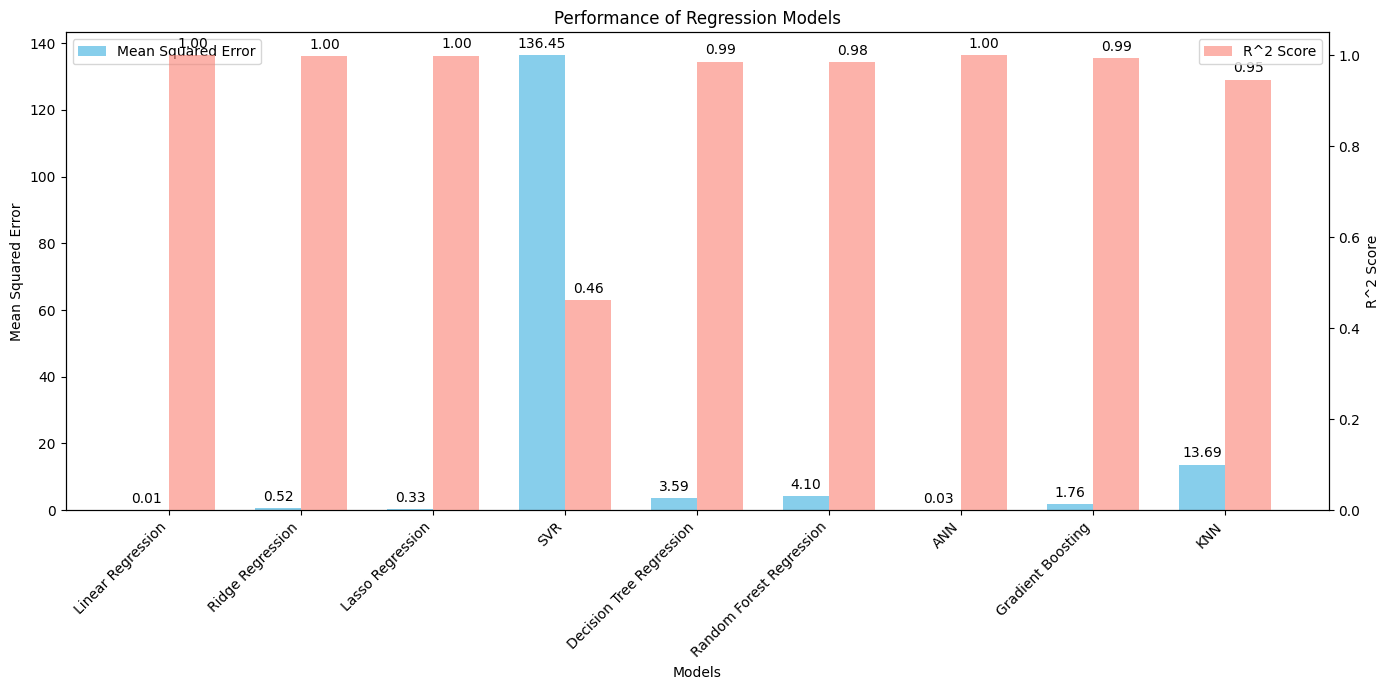

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = [
    "Linear Regression", "Ridge Regression", "Lasso Regression",
    "SVR", "Decision Tree Regression", "Random Forest Regression",
    "ANN", "Gradient Boosting", "KNN"
]

mse = [
    0.012240255034951459, 0.5225622382612267, 0.3341541024037911,
    136.4537406098125, 3.5902285714285744, 4.10431935857141,
    0.03218890061821315, 1.7624920871594878, 13.690781714285722
]

r2_scores = [
    0.9999517234569051, 0.9979389728119927, 0.9986820695419364,
    0.46181555284611286, 0.9858398518777475, 0.9838122367692945,
    0.9998730444060655, 0.9930485904944637, 0.9460024638747239
]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Mean Squared Error
bars1 = ax1.bar(x - width/2, mse, width, label='Mean Squared Error', color='skyblue')
ax1.set_xlabel('Models')
ax1.set_ylabel('Mean Squared Error')
ax1.set_title('Performance of Regression Models')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45, ha='right')
ax1.legend(loc='upper left')

# Add labels for MSE
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3), textcoords="offset points",
                  ha='center', va='bottom')

# Create another y-axis to plot R² scores
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, r2_scores, width, label='R^2 Score', color='salmon', alpha=0.6)
ax2.set_ylabel('R^2 Score')
ax2.legend(loc='upper right')

# Add labels for R² scores
for bar in bars2:
    height = bar.get_height()
    ax2.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3), textcoords="offset points",
                  ha='center', va='bottom')

fig.tight_layout()
plt.show()


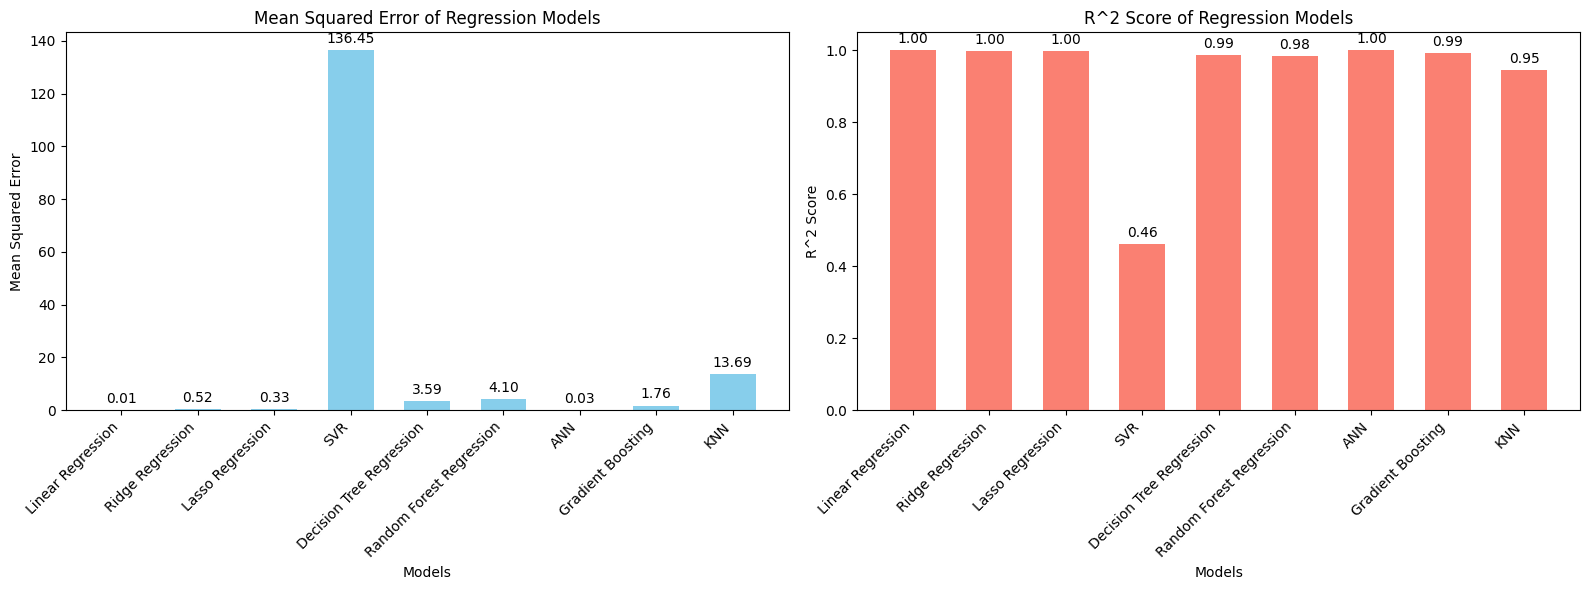

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = [
    "Linear Regression", "Ridge Regression", "Lasso Regression",
    "SVR", "Decision Tree Regression", "Random Forest Regression",
    "ANN", "Gradient Boosting", "KNN"
]

mse = [
    0.012240255034951459, 0.5225622382612267, 0.3341541024037911,
    136.4537406098125, 3.5902285714285744, 4.10431935857141,
    0.03218890061821315, 1.7624920871594878, 13.690781714285722
]

r2_scores = [
    0.9999517234569051, 0.9979389728119927, 0.9986820695419364,
    0.46181555284611286, 0.9858398518777475, 0.9838122367692945,
    0.9998730444060655, 0.9930485904944637, 0.9460024638747239
]

x = np.arange(len(models))  # the label locations
width = 0.6  # the width of the bars

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot Mean Squared Error
bars1 = ax1.bar(x, mse, width, color='skyblue')
ax1.set_xlabel('Models')
ax1.set_ylabel('Mean Squared Error')
ax1.set_title('Mean Squared Error of Regression Models')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45, ha='right')

# Add labels for MSE
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3), textcoords="offset points",
                  ha='center', va='bottom')

# Plot R² Score
bars2 = ax2.bar(x, r2_scores, width, color='salmon')
ax2.set_xlabel('Models')
ax2.set_ylabel('R^2 Score')
ax2.set_title('R^2 Score of Regression Models')
ax2.set_xticks(x)
ax2.set_xticklabels(models, rotation=45, ha='right')

# Add labels for R² scores
for bar in bars2:
    height = bar.get_height()
    ax2.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3), textcoords="offset points",
                  ha='center', va='bottom')

fig.tight_layout()
plt.show()
